In [13]:
%matplotlib inline

import os

import soundfile
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

import tensorflow

import functions

In [14]:
data = "/data/gijs/music/100 Best Classic Music/"
bins = 9 * 24  # I think there are about 9 octaves in the 50 - 22khz, range, we use 24 intervals per octave
samplerate = 22050
binsize = samplerate / bins # 2**10

In [15]:
filepaths = []
for dirpath, dirnames, filenames in os.walk(data):
    for filename in sorted(filenames):
        if filename[-3:] in ['ogg']:
            filepath = dirpath + filename
            filepaths.append(filepath)

In [16]:
orig_samples, orig_samplerate = soundfile.read(filepaths[0])
assert orig_samplerate == 44100

In [17]:
samples = orig_samples[:orig_samplerate*60:2, 0]


In [18]:
Audio(samples, rate=samplerate)

(25942, 52)

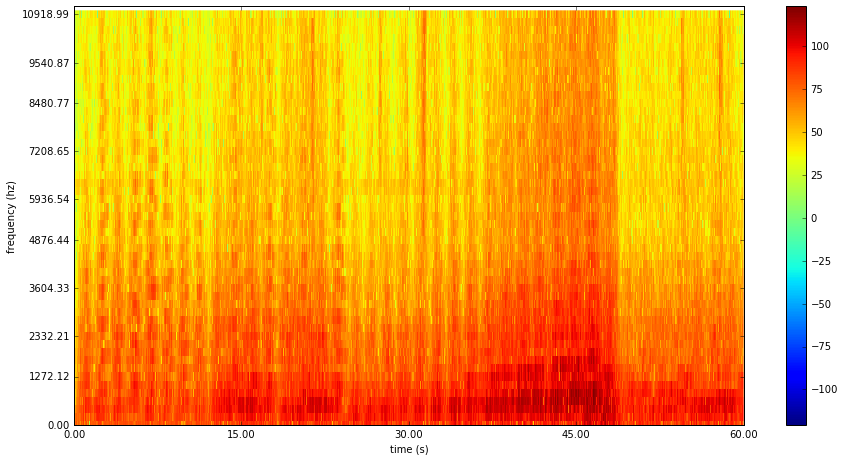

In [19]:
s = functions.stft(samples, binsize)

sshow, freq = functions.logscale_spec(s, factor=1.0, sr=samplerate)
ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel

timebins, freqbins = np.shape(ims)

plt.figure(figsize=(15, 7.5))
plt.imshow(np.transpose(ims), origin="lower", aspect="auto", interpolation="none")
plt.colorbar()

plt.xlabel("time (s)")
plt.ylabel("frequency (hz)")
plt.xlim([0, timebins-1])
plt.ylim([0, freqbins])

xlocs = np.float32(np.linspace(0, timebins-1, 5))
plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

ims.shape